# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Create lists to storage data
city_list = []
country = []
date = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []


#API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build base URL
base_url = f"{url}appid={weather_api_key}&units={units}&q="
base_url

'http://api.openweathermap.org/data/2.5/weather?appid=965c4351ac8fe297f7f114ced835c221&units=imperial&q='

In [12]:
# Set counters
counter = 0
set_counter = 1

print ("Beginning Data Retrieval")
print ("----------------------------------")

# Build the loop to perform a request for data on each city of the list
for city in cities:
    response = requests.get(base_url + city).json()
    print(f"Processing Record # : {counter} of Set {set_counter} | {city}")
    try:
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        if counter >= 50:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
    except:
        print("City not found. Skipping...")
        pass
    
print ("----------------------------------")
print ("Data Retrieval Complete")

Beginning Data Retrieval
----------------------------------
Processing Record # : 0 of Set 1 | jamestown
Processing Record # : 1 of Set 1 | saint-philippe
Processing Record # : 2 of Set 1 | te anau
Processing Record # : 3 of Set 1 | sao joao da barra
Processing Record # : 4 of Set 1 | ilulissat
Processing Record # : 5 of Set 1 | codrington
Processing Record # : 6 of Set 1 | alim
Processing Record # : 7 of Set 1 | punta arenas
Processing Record # : 8 of Set 1 | avarua
Processing Record # : 9 of Set 1 | bluff
Processing Record # : 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record # : 10 of Set 1 | prince george
Processing Record # : 11 of Set 1 | pisco
Processing Record # : 12 of Set 1 | port blair
Processing Record # : 13 of Set 1 | lotofaga
Processing Record # : 14 of Set 1 | victoria
Processing Record # : 15 of Set 1 | butaritari
Processing Record # : 16 of Set 1 | livingstone
Processing Record # : 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record

Processing Record # : 49 of Set 3 | yeysk
Processing Record # : 50 of Set 3 | upernavik
Processing Record # : 1 of Set 4 | korla
Processing Record # : 2 of Set 4 | tuatapere
Processing Record # : 3 of Set 4 | itajobi
Processing Record # : 4 of Set 4 | port elizabeth
Processing Record # : 5 of Set 4 | palasa
Processing Record # : 6 of Set 4 | ryuo
Processing Record # : 7 of Set 4 | iseyin
Processing Record # : 8 of Set 4 | sistranda
Processing Record # : 9 of Set 4 | samfya
Processing Record # : 10 of Set 4 | kiama
Processing Record # : 11 of Set 4 | port hedland
Processing Record # : 12 of Set 4 | puerto ayacucho
Processing Record # : 13 of Set 4 | hithadhoo
Processing Record # : 14 of Set 4 | opunake
Processing Record # : 15 of Set 4 | sturgis
Processing Record # : 16 of Set 4 | maluso
Processing Record # : 17 of Set 4 | veraval
Processing Record # : 18 of Set 4 | aktash
Processing Record # : 19 of Set 4 | saint-pierre
Processing Record # : 20 of Set 4 | sorland
Processing Record # : 

Processing Record # : 13 of Set 7 | suffolk
Processing Record # : 14 of Set 7 | mattru
Processing Record # : 15 of Set 7 | magadan
Processing Record # : 16 of Set 7 | erzin
Processing Record # : 17 of Set 7 | tasbuget
City not found. Skipping...
Processing Record # : 17 of Set 7 | khromtau
Processing Record # : 18 of Set 7 | ust-kuyga
Processing Record # : 19 of Set 7 | meadow lake
Processing Record # : 20 of Set 7 | phuket
Processing Record # : 21 of Set 7 | guadalupe y calvo
Processing Record # : 22 of Set 7 | kukes
Processing Record # : 23 of Set 7 | mingaora
Processing Record # : 24 of Set 7 | kisanga
Processing Record # : 25 of Set 7 | adrar
Processing Record # : 26 of Set 7 | broken hill
Processing Record # : 27 of Set 7 | dolinsk
Processing Record # : 28 of Set 7 | porto velho
Processing Record # : 29 of Set 7 | kamogawa
Processing Record # : 30 of Set 7 | carutapera
Processing Record # : 31 of Set 7 | pampas
Processing Record # : 32 of Set 7 | ostrovnoy
Processing Record # : 33

Processing Record # : 27 of Set 10 | arlit
Processing Record # : 28 of Set 10 | sao domingos do prata
Processing Record # : 29 of Set 10 | nhlangano
Processing Record # : 30 of Set 10 | sansai
City not found. Skipping...
Processing Record # : 30 of Set 10 | billings
Processing Record # : 31 of Set 10 | shimoda
Processing Record # : 32 of Set 10 | cavalcante
Processing Record # : 33 of Set 10 | boa vista
Processing Record # : 34 of Set 10 | qasigiannguit
Processing Record # : 35 of Set 10 | turayf
Processing Record # : 36 of Set 10 | cordoba
Processing Record # : 37 of Set 10 | isangel
Processing Record # : 38 of Set 10 | tambovka
Processing Record # : 39 of Set 10 | goundam
Processing Record # : 40 of Set 10 | fort-shevchenko
Processing Record # : 41 of Set 10 | grindavik
Processing Record # : 42 of Set 10 | jalu
Processing Record # : 43 of Set 10 | marang
Processing Record # : 44 of Set 10 | kamaishi
Processing Record # : 45 of Set 10 | kiyasovo
Processing Record # : 46 of Set 10 | dz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
weather_dict = {
    "City": city_list,
    "Lat": lat,
    "Lng": long,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date,
}

weather_df = pd.DataFrame(weather_dict)


#Export to csv
weather_df.to_csv('Output/cities.csv',encoding = 'utf-8',index = False)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,63.99,76,10,1.99,US,1666651518
1,saint-philippe,-21.3585,55.7679,69.39,82,36,6.55,RE,1666651657
2,te anau,-45.4167,167.7167,50.59,51,11,2.37,NZ,1666651635
3,sao joao da barra,-21.6403,-41.0511,75.29,87,56,6.89,BR,1666651658
4,ilulissat,69.2167,-51.1000,25.84,87,100,4.83,GL,1666651658


In [18]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.00000,564.000000,5.640000e+02
mean,19.817183,21.734724,59.656277,72.533688,60.39539,7.976082,1.666652e+09
std,33.439962,92.065476,20.190863,20.011824,39.41686,5.668562,1.198109e+02
min,-54.800000,-179.166700,-10.170000,15.000000,0.00000,0.000000,1.666651e+09
25%,-9.074875,-58.627400,48.195000,61.000000,20.00000,3.822500,1.666652e+09
50%,25.387600,23.858350,63.810000,77.000000,75.00000,6.690000,1.666652e+09
75%,46.637175,102.782525,75.812500,88.000000,100.00000,10.592500,1.666652e+09
max,78.218600,179.316700,93.330000,100.000000,100.00000,28.630000,1.666652e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. (No cities over 100)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

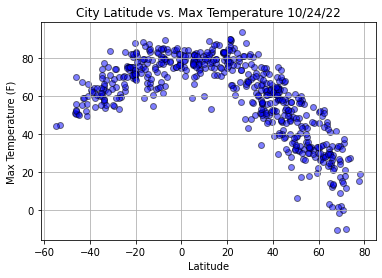

In [24]:
plt.scatter(weather_df["Lat"], 
            weather_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

## Latitude vs. Humidity Plot

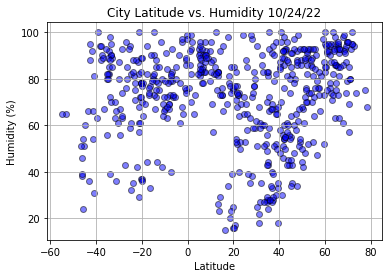

In [25]:
plt.scatter(weather_df["Lat"], 
            weather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

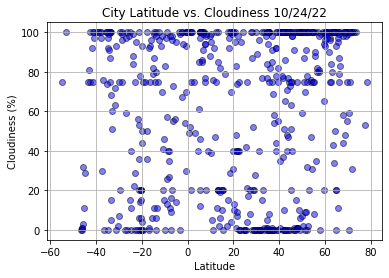

In [26]:
plt.scatter(weather_df["Lat"], 
            weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

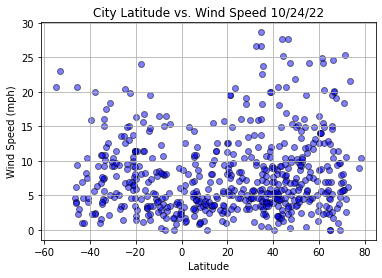

In [27]:
plt.scatter(weather_df["Lat"], 
            weather_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.5, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

## Linear Regression

In [31]:
#Split df in northern hemisphere and southern hemisphere
northern_hemisphere = weather_df.loc[(weather_df['Lat']>0)]
southern_hemisphere = weather_df.loc[(weather_df['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8576714687472147


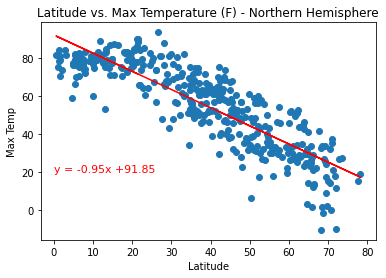

In [34]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#print and save
plt.savefig ("LatitudevsMaxTemp-NorthHemisphere.png")
plt.show()

In [ ]:
#High correlationan with negative slope in the regression, the lower the lattitude the lower the temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7145905525927456


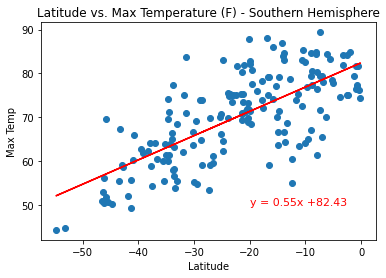

In [35]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#print and save
plt.savefig ("LatitudevsMaxTemp-SouthHemisphere.png")
plt.show()

In [ ]:
#High correlationan with positive slope in the regression, the higher the lattitude the higher the temperature.
#The slope for the southern hemisphere has a lower value, which means thar north is more sentitive to changes in temperature for one degree in latitud

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1431305936486813


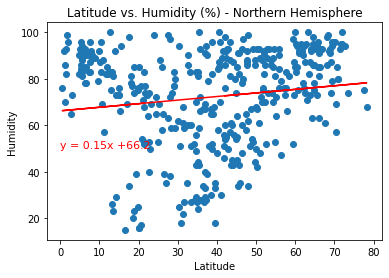

In [36]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("LatitudevsHumidity-NorthHemisphere.png")
plt.show()

In [ ]:
#Correlation is low, but there is ageneral trend for humidity to increase as we get further from the ecuator

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18945967064536626


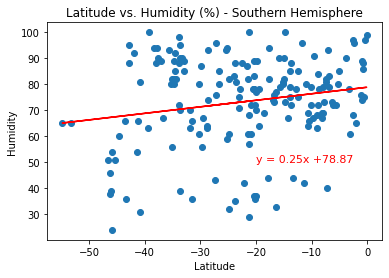

In [38]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("LatitudevsHumidity-SouthHemisphere.png")
plt.show()

In [ ]:
#Correlation is low, but opposite to the north, as we get further from the ecuator the humidity decreases 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16866723909303522


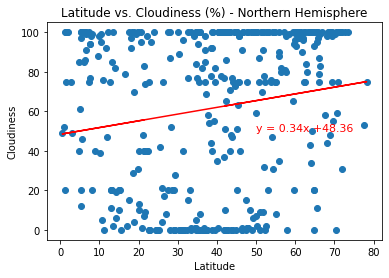

In [41]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("LatitudevsCloudiness-NorthHemisphere.png")
plt.show()

In [ ]:
#No clear trend in the scatter plot, correlation is low, there is no clear relationship between cloudiness and latitide

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.01331029651456874


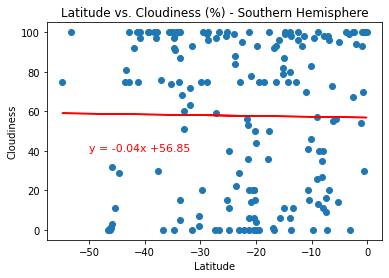

In [43]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("LatitudevsCloudiness-SouthHemisphere.png")
plt.show()

In [ ]:
#No clear trend in the scatter plot, correlation is low, there is no clear relationship between cloudiness and latitide

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17875196886998976


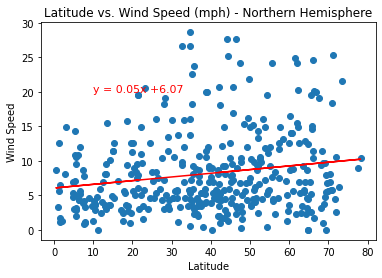

In [46]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("LatitudevsWindSpeed-NorthHemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20860902068882572


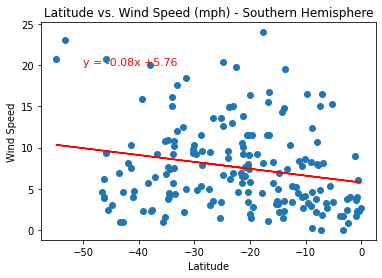

In [50]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("LatitudevsWindSpeed-SouthHemisphere.png")
plt.show()

In [ ]:
#Both graphs shoe that the closer to the ecuator the lower the wind speed. Slope is low which means that the change in wind speed is low for one degree in latitude